# Лабораторная работа # 1

# 0. Инициализация

In [82]:
# Для анимаций
from matplotlib import rc
rc('animation', html='jshtml')

# Для больших анимаций
import matplotlib as mpl
mpl.rcParams['animation.embed_limit'] = 1000.0 

import numpy as np
import scipy
from math import sqrt
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter

# Для корректного отображения 
%matplotlib inline
plt.style.use('fivethirtyeight')

# Для таблиц
import csv 

## Градиент

In [25]:
delta = 1e-9
def grad(f, x):
    """
    Функция вычисления градиента в заданной точке с константной точностью

    Аргументы:
    f -- функция
    x -- точка

    Возвращает:
    ans -- градиент функции в точке x
    """

    n = len(x)
    xd = np.copy(x)
    ans = np.zeros(n)

    for i in range(n):
        xd[i] += delta
        ans[i] = np.divide(f(xd) - f(x), delta)
        xd[i] -= delta

    return ans

## Градиентный спуск

In [26]:
def gradient_descent(f, x0, lr_search_func, num_iterations=1000, eps=1e-6, step_size=1):
    """
    Функция вычисления градиентного спуска с заданной функцией поиска коэффициента обучения

    Аргументы:
    f -- функция
    x0 -- начальная точка
    ----------------------------------------------------------------------------
    lr_search_func -- функция поиска оптимального коэффициента обучения (learning rate)
        Аргументы:
        f -- функция
        a -- левая граница интервала
        b -- правая граница интервала
        eps -- точность поиска

        Возвращает:
        x -- точка минимума функции
    ----------------------------------------------------------------------------
    eps -- точность поиска
    num_iterations -- количество итераций
    step_size -- размер шага

    Возвращает:
    points -- массив оптимальных на каждом шаге точек
    """
    def line_search(x, d):
        fd = lambda alpha: f(x - alpha*d)
        alpha = lr_search_func(fd, 0, 1, eps)
        return alpha

    x = np.copy(x0)
    points = np.array([x])
    for i in range(num_iterations):
        grad_x = grad(f, x);
        x = x - grad_x * line_search(x, grad_x) * step_size
        points = np.vstack([points, x])
    return points

## Для отрисовки

In [27]:
def init():
    global X, Y, Z, f, x0
    Z = np.vectorize(lambda x, y: f(np.array([x, y])))(X, Y)

### 3D визуализация функции

In [28]:
def print_f(elev=30, azim=60):
  # Создание фигуры и трехмерной оси
  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(111, projection='3d')

  # Установка угол обзора
  ax.view_init(elev=elev, azim=azim)

  # Построение поверхности
  ax.plot_surface(X, Y, Z)

  # Построение начальной точки
  ax.plot(x0[0], x0[1], f(x0), 'ro', label='Начальная точка')

  # Установка отступа между графиком и значениями осей
  ax.tick_params(pad=10)

  # Добавление легенды
  plt.legend(loc='upper left')

  # Установка размера шрифта для подписей осей
  ax.tick_params(axis='x', labelsize=10)
  ax.tick_params(axis='y', labelsize=10)
  ax.tick_params(axis='z', labelsize=10)

  # Добавление заголовка и подписей осей
  plt.title('График функции с начальной точкой')
  ax.set_xlabel('Ось X', labelpad=20.0)
  ax.set_ylabel('Ось Y', labelpad=20.0)
  ax.set_zlabel('Ось f(x, y)', labelpad=20.0)

  # Отображение графика
  plt.show()

In [29]:
def print_f_animated(interval=100, elev = 30, st_azim = 80, delta=5):
    # plt.title('График функции с начальной точкой')
    fig = plt.figure(figsize=(7, 7))
    ax = plt.axes(projection='3d')
    def frame(w):
        ax.clear()

        # угол обзора
        azim = (w*delta + st_azim)%360
        ax.view_init(elev=elev, azim=azim)

        # Построение поверхности
        ax.plot_surface(X, Y, Z)

        # Построение начальной точки
        label = 'elev=' + str(elev) + ', azim=' + str(azim)
        ax.plot(x0[0], x0[1], f(x0), 'ro', markersize=3, label=label)

        # Установка отступа между графиком и значениями осей
        ax.tick_params(pad=10)

        # Установка размера шрифта для подписей осей
        ax.tick_params(axis='x', labelsize=10)
        ax.tick_params(axis='y', labelsize=10)
        ax.tick_params(axis='z', labelsize=10)
        
        # Добавление заголовка и подписей осей
        ax.set_xlabel('Ось X', labelpad=20.0)
        ax.set_ylabel('Ось Y', labelpad=20.0)
        ax.set_zlabel('Ось f(x, y)', labelpad=20.0)

        ax.legend(loc='upper left')

        return ax
    plt.close()

    frames = np.ceil(360 / delta).astype(int)

    return FuncAnimation(fig, frame, interval=interval, frames=frames, blit=False, repeat=True)

### Линии уровня и градиент

In [30]:
def print_lines_grad(list_result, list_label):
  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(111)

  for i in range(len(list_result)):
    levels=np.unique(np.sort(f(list_result[i].T)))
    ax.contour(X, Y, Z, levels=levels, colors='red', antialiased=True, linewidths=1.0)

  for i in range(len(list_result)):
    x = list_result[i][:, 0]
    y = list_result[i][:, 1]
    ax.plot(x, y, marker='.', markersize=10, markerfacecolor='black', label=list_label[i], linewidth = 2)
    print(f'{list_label[i]:15} ==> {f(list_result[i][-1]):10f} in [{list_result[i][-1][0]:10f}, {list_result[i][-1][1]:10f}]')

  plt.legend(loc='upper left')
  plt.show()

In [31]:
def print_lines_grad_animated(list_result, list_label, interval=100, frames=-1):
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111)
    def frame(w):
        ax.clear()

        for i in range(len(list_result)):
          levels=np.unique(np.sort(f(list_result[i][:frames].T)))
          ax.contour(X, Y, Z, levels, colors='red', antialiased=True, linewidths=1.0)

        for i in range(len(list_result)):
          x = list_result[i][:w, 0]
          y = list_result[i][:w, 1]
          ax.plot(x, y, marker='.', markersize=10, markerfacecolor='black', label=list_label[i], linewidth = 2)

        ax.legend(loc='upper left')

        return ax

    plt.close()
    if frames == -1 or frames > len(list_result[0]):
      frames = len(list_result[0])

    return FuncAnimation(fig, frame, interval=interval, frames=frames, blit=False, repeat=True)

### 3D и градиент

In [32]:
def print_full_grad(list_result, list_label, title='Градиентный спуск на графике функции', elev = 30, azim = 80, filename='', filename_extension='.png', dpi=1024):
  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(projection='3d')

  for i in range(len(list_result)):
    x = list_result[i][:, 0]
    y = list_result[i][:, 1]
    z = np.vectorize(lambda x, y: f(np.array([x, y])))(x, y)
    ax.plot(x, y, marker='.', markersize=10, markerfacecolor='black', zs=z, label=list_label[i], linewidth = 2)
    print(f'{list_label[i]:15} ==> {f(list_result[i][-1]):10f} in [{list_result[i][-1][0]:10f}, {list_result[i][-1][1]:10f}]')
    
  ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
  ax.view_init(elev=elev, azim=azim)
  
  # Установка отступа между графиком и значениями осей
  ax.tick_params(pad=10)

  # Добавление легенды
  ax.legend(loc='upper left')

  # Установка размера шрифта для подписей осей
  ax.tick_params(axis='x', labelsize=10)
  ax.tick_params(axis='y', labelsize=10)
  ax.tick_params(axis='z', labelsize=10)

  # Добавление заголовка и подписей осей
  if title != '':
    plt.title(title)
  
  ax.set_xlabel('Ось X', labelpad=20.0)
  ax.set_ylabel('Ось Y', labelpad=20.0)
  ax.set_zlabel('Ось f(x, y)', labelpad=20.0)


  if(filename != ''):
    plt.savefig(filename + filename_extension, dpi=dpi, bbox_inches=0, transparent=True)

  plt.show()


In [33]:
def print_full_grad_animated(list_result, list_label, interval=100, frames=-1, elev = 30, azim = 80):
    fig = plt.figure(figsize=(7, 7))
    ax = plt.axes(projection='3d')

    def frame(w):
        ax.clear()
        for i in range(len(list_result)):
            x = list_result[i][:w+1, 0]
            y = list_result[i][:w+1, 1]
            z = np.vectorize(lambda x, y: f(np.array([x, y])))(x, y)
            ax.plot(x, y, marker='.', markersize=10, markerfacecolor='black', zs=z, label=list_label[i], linewidth = 2, markevery=(w,w+1))

        ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
        ax.view_init(elev=elev, azim=azim)
        ax.legend(loc='upper left')

        return ax

    plt.close()
    if frames == -1 or frames > len(list_result[0]):
      frames = len(list_result[0])

    return FuncAnimation(fig, frame, interval=interval, frames=frames, blit=False, repeat=True)

## Для вывода

In [34]:
def print_result(result, sep=''):
    global f
    print(len(result), ":")
    for i in range(len(result)):
        print(i, sep, result[i], sep, f(result[i]))

In [35]:
def save_result_text(result, filename, sep=' ', sp="%g"):
    with open(filename, 'w') as file:
        for data in result:
            for x in data:
                file.write((sp + "%s") % (x, sep))  
            file.write((sp + "\n") % f(data))

In [36]:
def save_result_table(result, filename, fields=[], sp='%g'):
    with open(filename, 'w') as csvfile:  
        # создание объекта witer csv
        csvwriter = csv.writer(csvfile, quoting=csv.QUOTE_NONE)  
            
        # запись шапки
        if len(fields) > 0:
            csvwriter.writerow(fields)  
            
        # запись данных 
        data = np.insert(result, len(result[0]), [f(x) for x in result], axis=1)
        formatted_data = [[sp % x for x in row] for row in data]
        csvwriter.writerows(formatted_data)

In [37]:
def save_result(result, filename, sp="%g"):
    save_result_text(result, filename + '.txt', sp=sp)
    save_result_table(result, filename + '.csv', sp=sp, fields=['X', 'Y', 'F'])

# 1. Реализуйте градиентный спуск с постоянным шагом (learning rate).

In [38]:
def gradient_descent_constant(f, x0, lr=0.01, num_iterations=1000):
    """
    Градиентный спуск с постоянным шагом.

    Аргументы:
    f -- функция
    x0 -- начальная точка
    lr -- постоянный коэффициент обучения (learning rate)
    num_iterations -- количество итераций

    Возвращает:
    gradient_descent(...)
    """
    def const_lr(f, a, b, eps=1e-6):
        return lr
    
    return gradient_descent(f, x0, const_lr, num_iterations)

In [39]:
filepath = 'source\\Task1\\'

## Пример 1:

constant        ==> 3124.681687 in [ 25.000000, -49.996817]


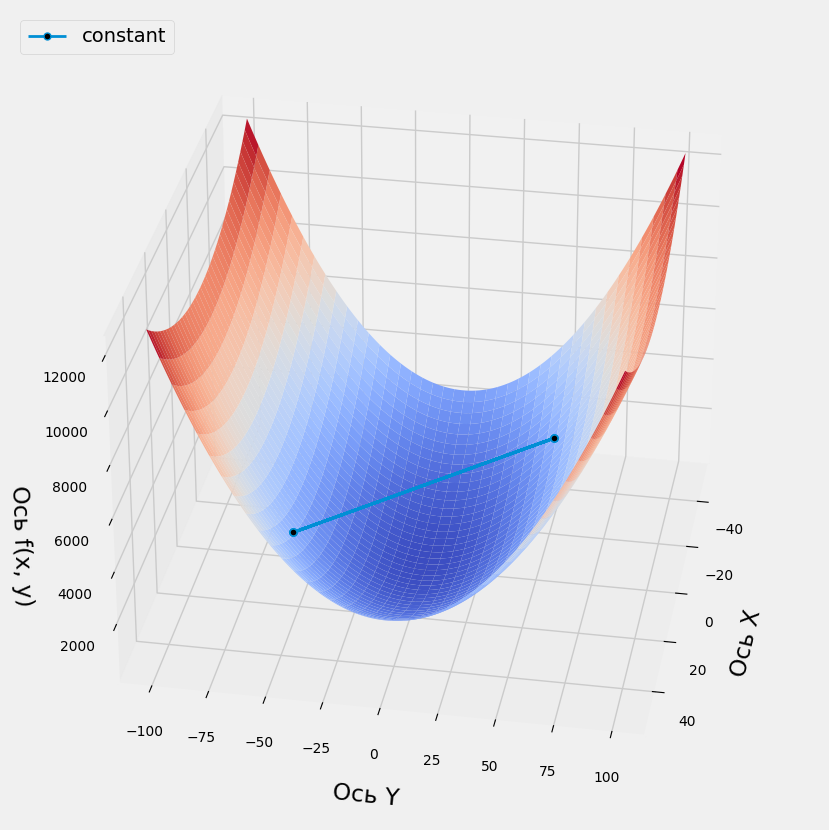

In [52]:
filename = 'f1_const'

def f(x):
    return x[0] ** 2 + x[1] ** 2

x = np.linspace(-50, 50, 120)
y = np.linspace(-100, 100, 120)
X, Y = np.meshgrid(x, y)
x0 = np.array([25, -50], dtype=float)
init()

num_iter = 10;
result = [gradient_descent_constant(f, x0, lr=1, num_iterations=num_iter)]
result_label = ['constant']

# print_result(result[0])
save_result(result[0], filepath + filename)
# print_full_grad(result, result_label, title='Пример 1: градиентный спуск на графике функции', azim=10, filename=filepath + filename)
print_full_grad(result, result_label, title='', azim=10, filename=filepath + filename)

## Пример 2:

constant        ==> -4497.733222 in [ 46.479291,  97.661677]


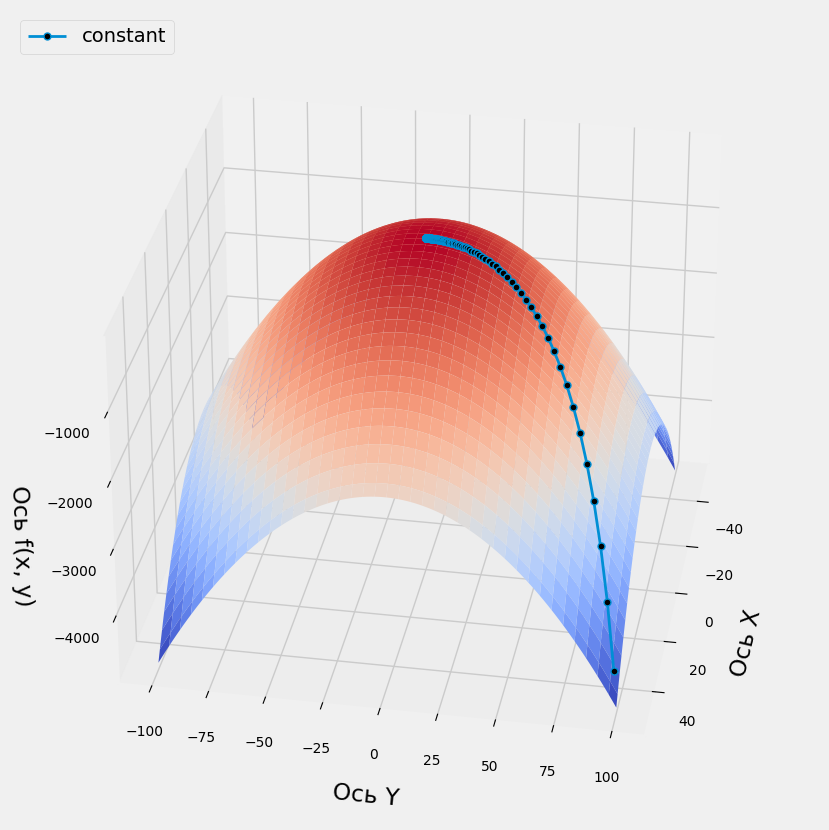

In [41]:
filename = 'f2_const'

def f(x):
    return -0.84233647 * x[0] ** 2 + -0.28077882 * x[1] ** 2

x = np.linspace(-50, 50, 120)
y = np.linspace(-100, 100, 120)
X, Y = np.meshgrid(x, y)
x0 = np.array([0.00000014, 0.1], dtype=float)
init()

num_iter = 126
result = [gradient_descent_constant(f, x0, lr=0.1, num_iterations=num_iter)]
result_label = ['constant']

# print_result(result[0])
save_result(result[0], filepath + filename)
# print_full_grad(result, result_label, title='Пример 2: градиентный спуск на графике функции', azim=10, filename=filepath + filename)
print_full_grad(result, result_label, title='', azim=10, filename=filepath + filename)

## Пример 3:

constant        ==>   8.596431 in [ -1.669139,  -2.233745]


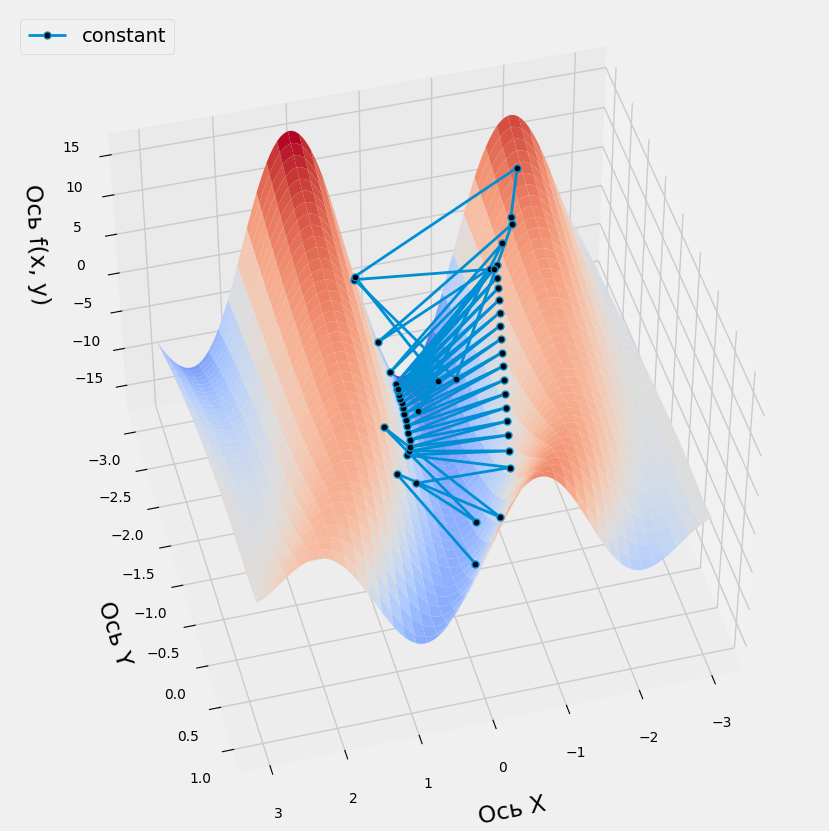

In [42]:
filename = 'f3_const'

def f(x):
    return (x[0]**2 - x[1]**2 - 9)*np.cos(2*x[0]+1-np.exp(x[1]))

x = np.linspace(-3, 3, 120)
y = np.linspace(-3, 1, 120)
X, Y = np.meshgrid(x, y)
x0 = np.array([-0.1, 0.4], dtype=float)
init()

num_iter = 50;
result = [gradient_descent_constant(f, x0, lr=0.07, num_iterations=num_iter)]
result_label = ['constant']

# print_result(result[0])
save_result(result[0], filepath + filename)
# print_full_grad(result, result_label, title='Пример 3: градиентный спуск на графике функции', elev=45, azim=75, filename=filepath + filename)
print_full_grad(result, result_label, title='', elev=45, azim=75, filename=filepath + filename)

# 2. Реализуйте метод одномерного поиска (метод дихотомии, метод Фибоначчи, метод золотого сечения) и градиентный спуск на его основе.

## (a) Метод дихотомии

In [43]:
def dichotomy_search(f, a, b, eps=1e-6):
    """
    Метод дихотомии для поиска минимума функции f на интервале [a,b] с точностью eps

    Аргументы:
    f -- функция
    a -- начальная точка интервала
    b -- конечная точка интервала
    eps -- точность поиска

    Возвращает:
    x -- точка минимума функции
    """
    while b - a > eps:
        c = (a + b) / 2
        if f(c - eps) < f(c + eps):
            b = c
        else:
            a = c
    return (a + b) / 2

def gradient_descent_dichotomy(f, x0, num_iterations=1000, eps=1e-6, step_size=0.01):
    """
    Градиентный спуск на основе метода дихотомии

    Аргументы:
    f -- функция
    x0 -- начальная точка
    num_iterations -- количество итераций
    eps -- точность поиска
    step_size -- размер шага
    
    Возвращает:
    gradient_descent(...)
    """

    return gradient_descent(f, x0, dichotomy_search, num_iterations, eps, step_size)

## (b) Метод Фибоначчи

In [44]:
def fibonacci_search(f, a, b, n):
    """
    Метод Фибоначчи для одномерного поиска.

    Аргументы:
    f -- функция
    a -- левая граница интервала
    b -- правая граница интервала
    n -- "точность" поиска функции

    Возвращает:
    x -- точка минимума
    """

    fib = [1, 1]
    while fib[-1] < n:
        fib.append(fib[-1] + fib[-2])

    k = len(fib) - 1
    x1 = a + (fib[k - 2] / fib[k]) * (b - a)
    x2 = a + (fib[k - 1] / fib[k]) * (b - a)
    f1 = f(x1)
    f2 = f(x2)

    for i in range(k - 2):
        if f1 < f2:
            b = x2
            x2 = x1
            f2 = f1
            x1 = a + (fib[k - i - 3] / fib[k - i - 1]) * (b - a)
            f1 = f(x1)
        else:
            a = x1
            x1 = x2
            f1 = f2
            x2 = a + (fib[k - i - 2] / fib[k - i - 1]) * (b - a)
            f2 = f(x2)

    return (a + b) / 2

def gradient_descent_fibonacci(f, x0, num_iterations=1000, n=6900, step_size=0.01):
    """
    Градиентный спуск на основе метода Фибоначчи

    Аргументы:
    f -- функция
    x0 -- начальная точка
    num_iterations -- количество итераций
    n -- "точность" поиска
    step_size -- размер шага
    
    Возвращает:
    gradient_descent(...)
    """

    return gradient_descent(f, x0, fibonacci_search, num_iterations, n, step_size)

## (c) Метод золотого сечения

In [45]:
def golden_section_search(f, a, b, eps=1e-6):
    """
    Метод золотого сечения для одномерного поиска.

    Аргументы:
    f -- функция
    a -- левая граница интервала
    b -- правая граница интервала
    eps -- точность поиска функции

    Возвращает:
    x -- точка минимума
    """
    phi = (1 + np.sqrt(5)) / 2
    x1 = b - (b - a) / phi
    x2 = a + (b - a) / phi
    while abs(b - a) > eps:
        if f(x1) < f(x2):
            b = x2
        else:
            a = x1
        x1 = b - (b - a) / phi
        x2 = a + (b - a) / phi
    return (a + b) / 2

def gradient_descent_golden_section(f, x0, num_iterations=1000, eps=1e-6, step_size=0.01):
    """
    Градиентный спуск на основе метода золотого сечения.

    Аргументы:
    f -- функция
    x0 -- начальная точка
    num_iterations -- количество итераций
    eps -- точность поиска

    Возвращает:
    gradient_descent(...)
    """
    return gradient_descent(f, x0, golden_section_search, num_iterations, eps, step_size)

In [ ]:
filepath = 'source\\Task2\\'

## Пример 1:

constant        ==>   1.802286 in [ -0.340864,   0.122798]
dichotomy       ==>   0.042832 in [  1.206564,   1.457076]


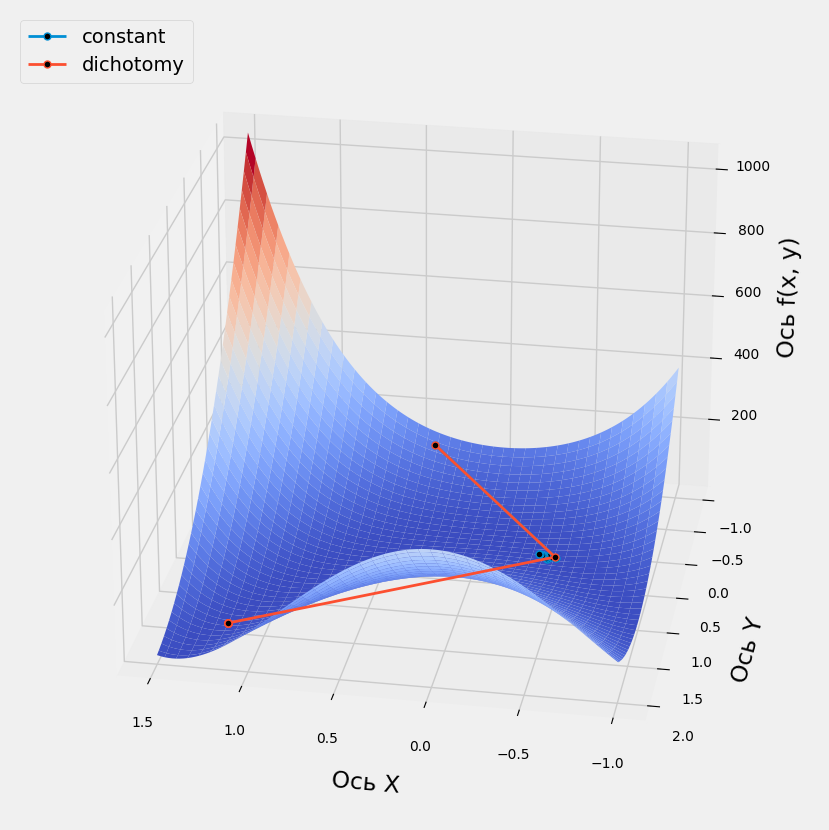

In [113]:
fileprefix = 'f1_'

# Функция Розенброка min => f(1, 1) = 0
f = scipy.optimize.rosen

x = np.linspace(-1, 1.5, 120)
y = np.linspace(-1, 2, 120)
X, Y = np.meshgrid(x, y)
x0 = np.array([0.4, -0.9], dtype=float)
init()

num_iter = 10;
result = [gradient_descent_constant(f, x0, lr=.005, num_iterations=num_iter),
          gradient_descent_dichotomy(f, x0, step_size=1, num_iterations=num_iter)]
result_label = ['constant', 'dichotomy']

# print_result(result[0])
save_result(result[0], filepath + fileprefix + result_label[0])
save_result(result[1], filepath + fileprefix + result_label[1])
print_full_grad(result, result_label, title='', elev=25, azim=100, filename=filepath + fileprefix + result_label[0] + '_' + result_label[1])

## Пример 2:

constant        ==> 244.127008 in [ -0.938126,  -0.012312]
dichotomy       ==>   3.002497 in [ -0.003112,  -0.999916]


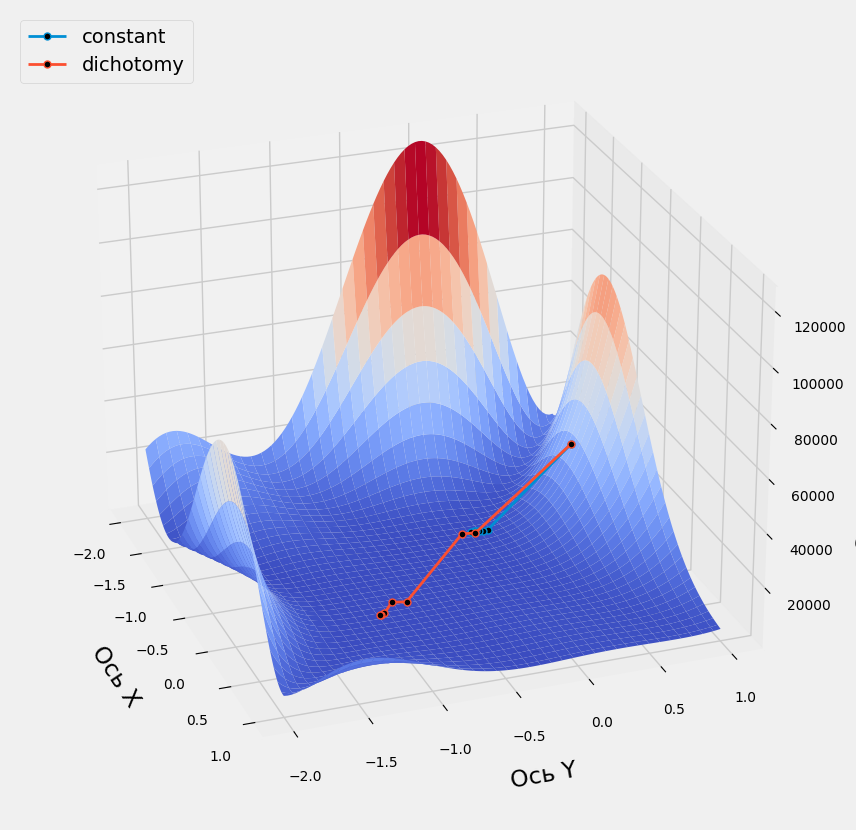

In [149]:
fileprefix = 'f2_'

# Функция Гольдшейна-Прайса min => f(0, -1) = 3
def f(x):
    return (1 + (x[0] + x[1] + 1)**2 * (19 - 14*x[0] + 3*x[0]**2-14*x[1]+6*x[0]*x[1]+3*x[1]**2)) * (30 + (2*x[0] - 3*x[1])**2 * (18 - 32*x[0] + 12*x[0]**2 + 48*x[1] - 36*x[0]*x[1]+27*x[1]**2))

x = np.linspace(-2, 1, 120)
y = np.linspace(-2, 1, 120)
X, Y = np.meshgrid(x, y)
x0 = np.array([-0.9, 0.7], dtype=float)
init()

num_iter = 7;
result = [gradient_descent_constant(f, x0, lr=.000005, num_iterations=num_iter),
          gradient_descent_dichotomy(f, x0, step_size=0.8, num_iterations=num_iter)]
result_label = ['constant', 'dichotomy']

# print_result(result[0])
save_result(result[0], filepath + fileprefix + result_label[0])
save_result(result[1], filepath + fileprefix + result_label[1])
print_full_grad(result, result_label, title='', elev=25, azim=-20, filename=filepath + fileprefix + result_label[0] + '_' + result_label[1])

# 5. Реализуйте генератор случайных квадратичных функций $n$ переменных с числом обусловленности $k$.

# Test

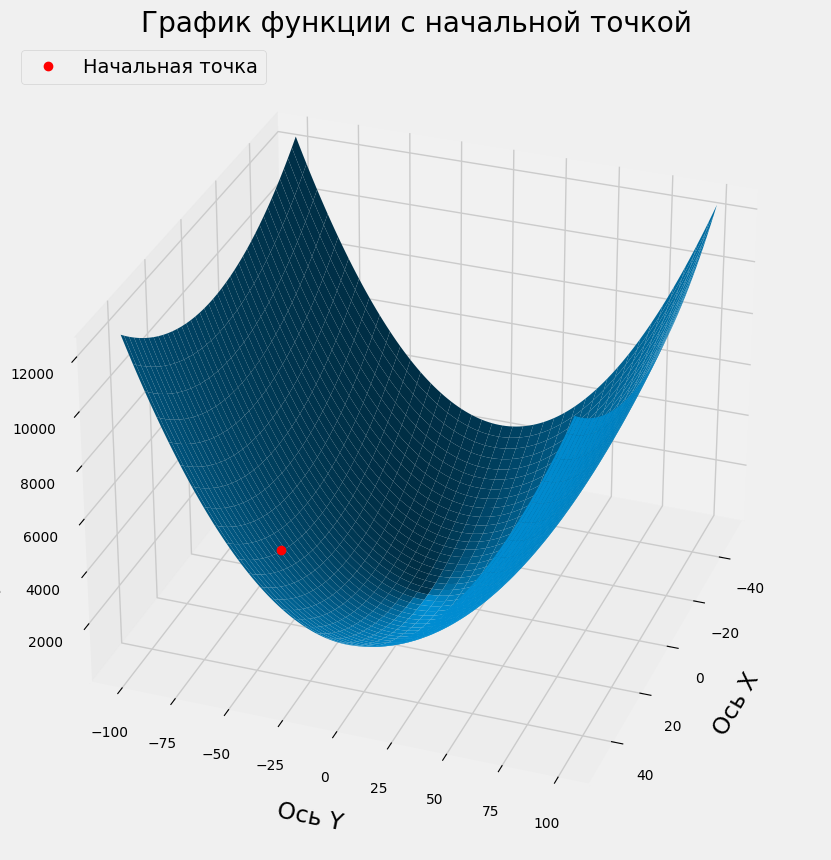

In [46]:
def f(x):
    return x[0] ** 2 + x[1] ** 2

x = np.linspace(-50, 50, 120)
y = np.linspace(-100, 100, 120)
X, Y = np.meshgrid(x, y)
x0 = np.array([25, -50], dtype=float)

init()

print_f(azim=20)
# print_f_animated(delta=1)

In [47]:
num_iter = 1000;

result = [gradient_descent_constant(f, x0, lr=.5, num_iterations=num_iter),
          gradient_descent_dichotomy(f, x0, step_size=1, num_iterations=num_iter),
          gradient_descent_golden_section(f, x0, step_size=1, num_iterations=num_iter),
          gradient_descent_fibonacci(f, x0, step_size=1, num_iterations=num_iter)]
result_label = ['constant', 'dichotomy', 'golden_section', 'fibonacci']

constant        ==>   0.000000 in [ -0.000000,  -0.000000]
dichotomy       ==>   0.000000 in [ -0.000000,  -0.000000]
golden_section  ==>   0.000000 in [ -0.000000,  -0.000000]
fibonacci       ==>   0.000000 in [ -0.000000,  -0.000000]


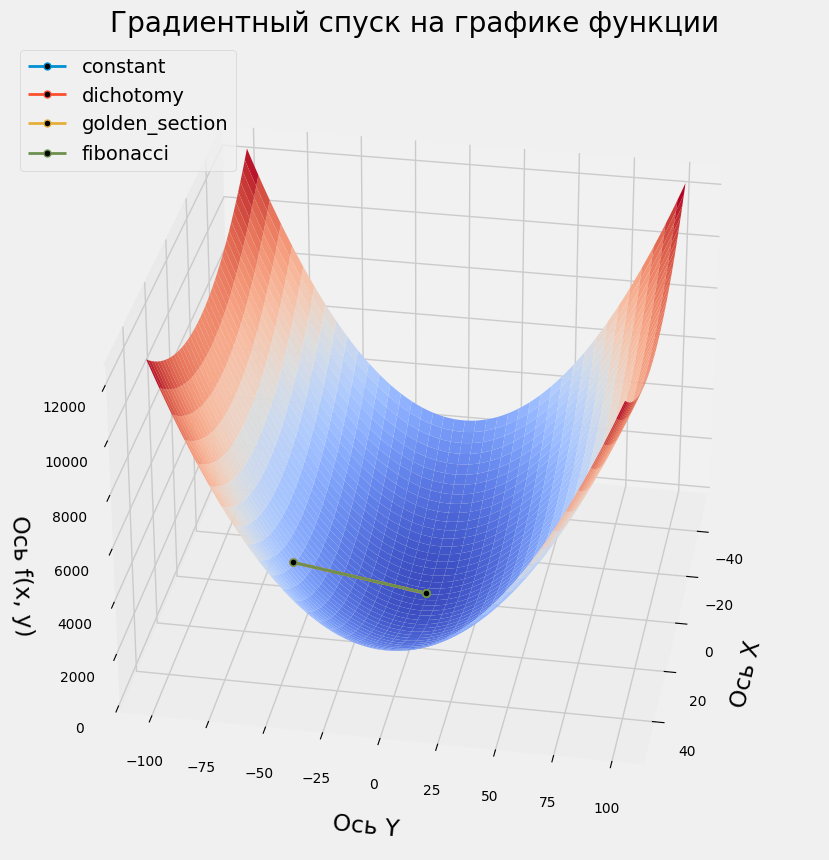

In [49]:
print_full_grad(result, result_label, azim=10)
# print_full_grad_animated(result, result_label, interval=100, frames=100, azim=200)

constant        ==>   0.000000 in [ -0.000000,  -0.000000]
dichotomy       ==>   0.000000 in [ -0.000000,  -0.000000]
golden_section  ==>   0.000000 in [ -0.000000,  -0.000000]
fibonacci       ==>   0.000000 in [ -0.000000,  -0.000000]


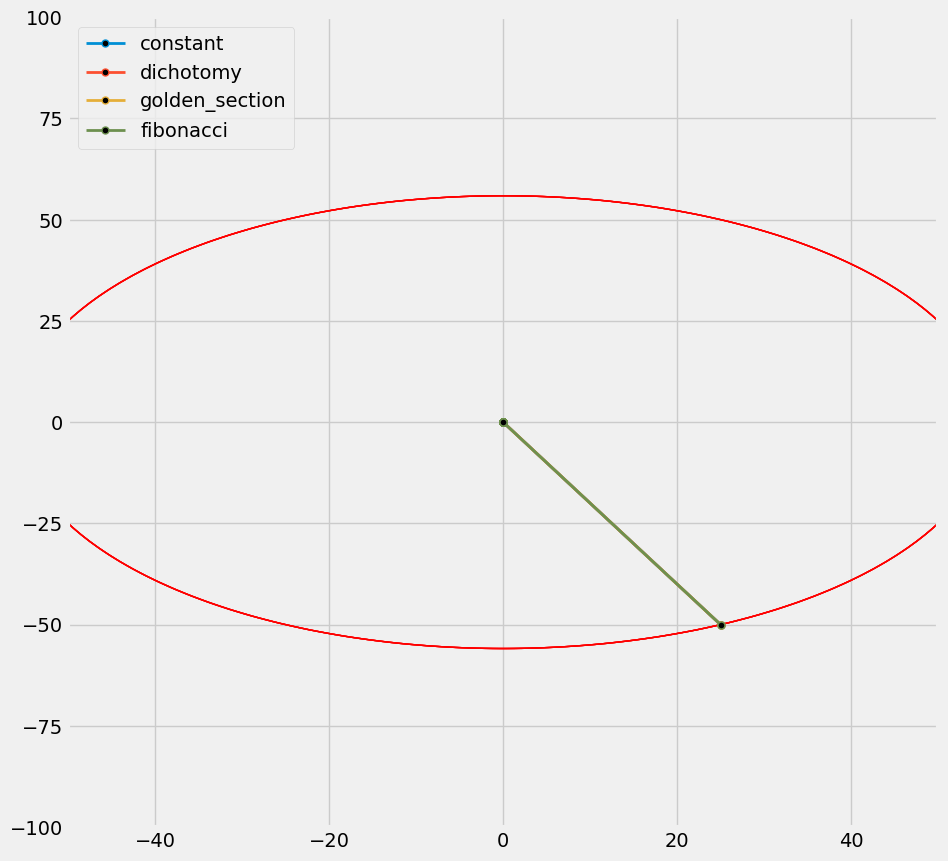

In [50]:
print_lines_grad(result, result_label)
# print_lines_grad_animated(result, result_label, interval=100, frames=100)